<a href="https://colab.research.google.com/github/Sayandeep27/Statistics/blob/main/Audult_data_analysis_from_UCI_ML_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)


In [2]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables into numerical
df['workclass'] = df['workclass'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['marital_status'] = df['marital_status'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes
df['relationship'] = df['relationship'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['native_country'] = df['native_country'].astype('category').cat.codes
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [3]:
df['capital_net_gain'] = df['capital_gain'] - df['capital_loss']

# Create age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [4]:
df.describe()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_net_gain
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.330795,1077.648844,87.303830,40.437456,36.718866,0.240810,990.345014
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581,7408.986951
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-4356.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,99999.000000


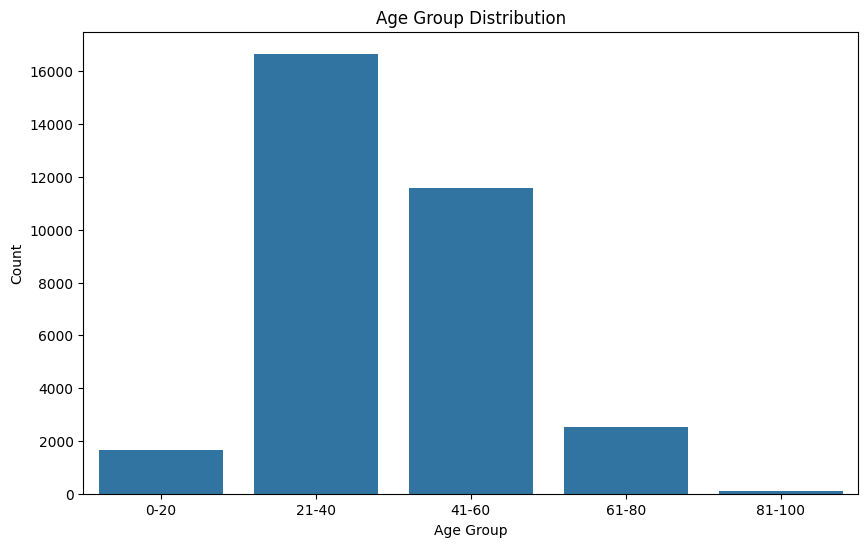

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


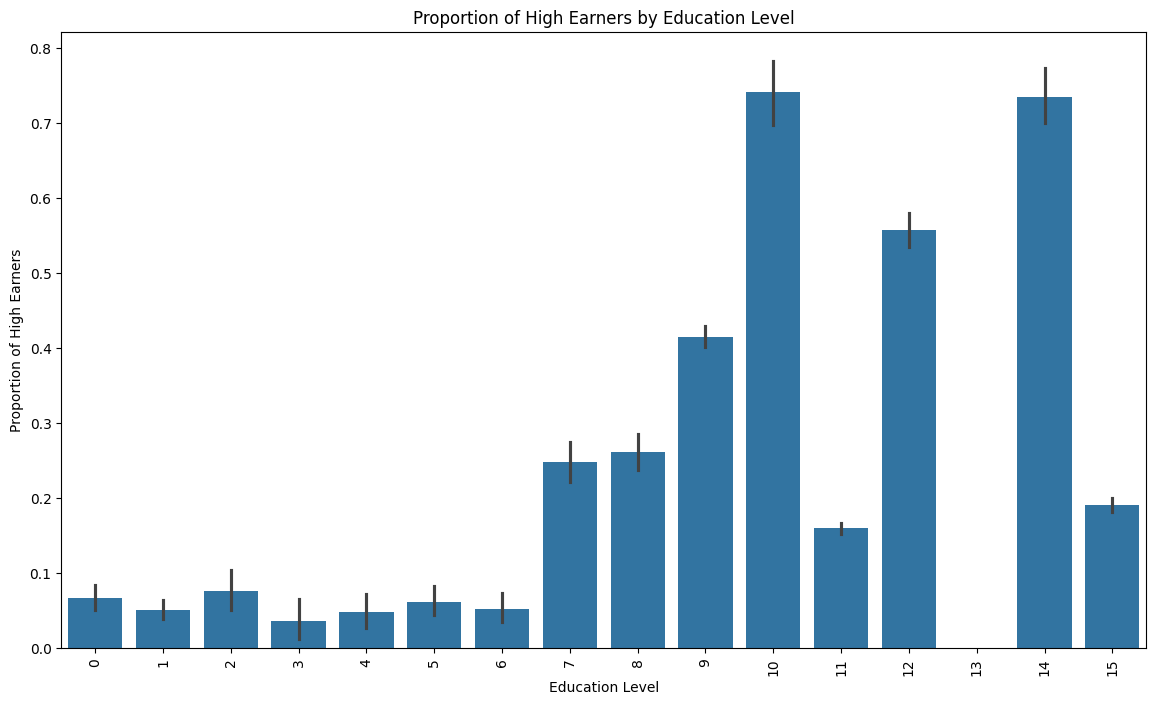

In [6]:
plt.figure(figsize=(14, 8))
sns.barplot(x='education', y='income', data=df, estimator=lambda x: sum(x == 1) / len(x))
plt.title('Proportion of High Earners by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of High Earners')
plt.xticks(rotation=90)
plt.show()


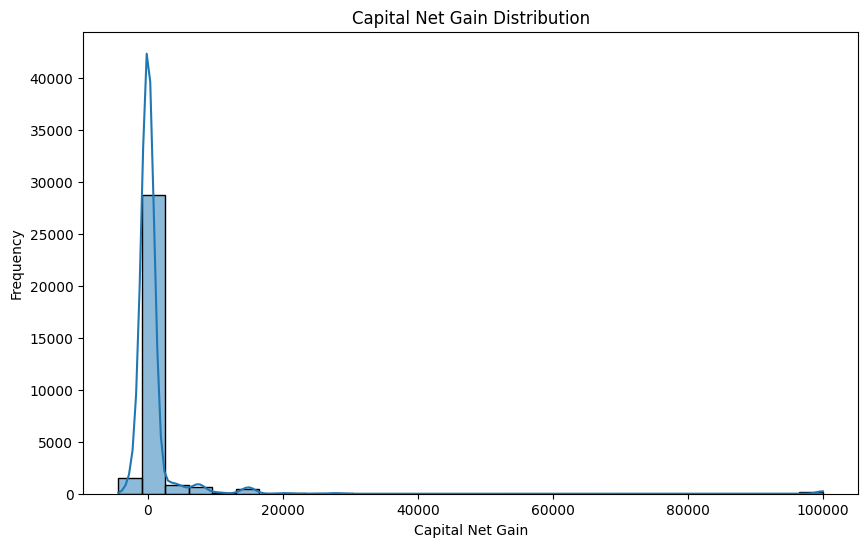

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['capital_net_gain'], bins=30, kde=True)
plt.title('Capital Net Gain Distribution')
plt.xlabel('Capital Net Gain')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Create a new feature for workclass type (0 for private, 1 for others)
df['workclass_type'] = np.where(df['workclass'] == 0, 1, 0)

# Create a new feature for occupation type (0 for higher earning, 1 for others)
higher_earning_occupations = [0, 1, 2, 4, 5, 9, 11]  # Based on domain knowledge
df['occupation_type'] = df['occupation'].apply(lambda x: 1 if x in higher_earning_occupations else 0)


Test 1: Hours Worked per Week between High and Low Earners
We want to test if there's a significant difference in hours worked per week between high earners and low earners.

Null Hypothesis (H0): There is no difference in hours worked per week between high earners and low earners.
Alternative Hypothesis (H1): There is a difference in hours worked per week between high earners and low earners.

In [11]:
# Split data into two groups
high_earners = df[df['income'] == 1]['hours_per_week']
low_earners = df[df['income'] == 0]['hours_per_week']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_earners, low_earners)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


T-statistic: 42.583873499437956
P-value: 0.0
We reject the null hypothesis.


Test 2: Capital Net Gain by Age Group
We want to test if there's a significant difference in capital net gain across different age groups.

Null Hypothesis (H0): There is no difference in capital net gain across different age groups.
Alternative Hypothesis (H1): There is a difference in capital net gain across different age groups.

We'll use ANOVA for this.

In [12]:
# Perform ANOVA
f_stat, p_value = stats.f_oneway(df[df['age_group'] == '0-20']['capital_net_gain'],
                                 df[df['age_group'] == '21-40']['capital_net_gain'],
                                 df[df['age_group'] == '41-60']['capital_net_gain'],
                                 df[df['age_group'] == '61-80']['capital_net_gain'],
                                 df[df['age_group'] == '81-100']['capital_net_gain'])

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


F-statistic: 41.24281441655382
P-value: 1.537613741982526e-34
We reject the null hypothesis.
